# Photon correlation spectroscopy development
### M. L. Whittaker 
### 26 June 2025

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.signal import correlate
from scipy.stats import skew, kurtosis
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import PowerTransformer

import pct

In [50]:
path1 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/18.5C'

In [51]:
data = pd.read_csv(path1 + '/SISV_1%_18.5C.csv', skiprows=3)

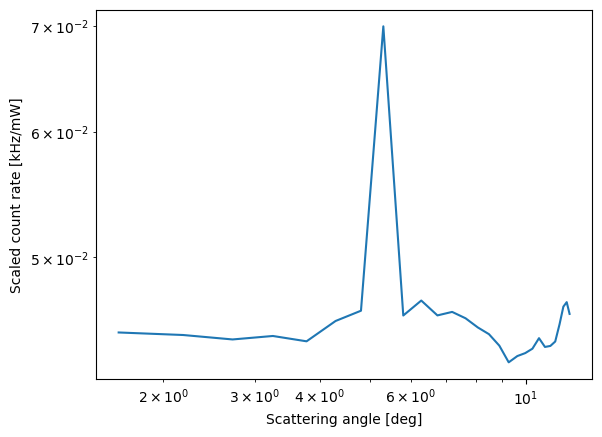

In [52]:
subset1 = data[::3]
subset2 = data[1::3]
plt.plot(4 * np.pi * np.sin(np.deg2rad(subset1['Scattering angle [deg]'])/2), subset1['Scaled count rate [kHz/mW]'])
plt.xlabel('Scattering angle [deg]')
plt.xscale('log')
plt.ylabel('Scaled count rate [kHz/mW]')
plt.yscale('log')
plt.show()

In [210]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/18.5C/Measurement 3/Repetition 0/Count Trace.csv'

In [211]:
data = pd.read_csv(path2, skiprows=2)

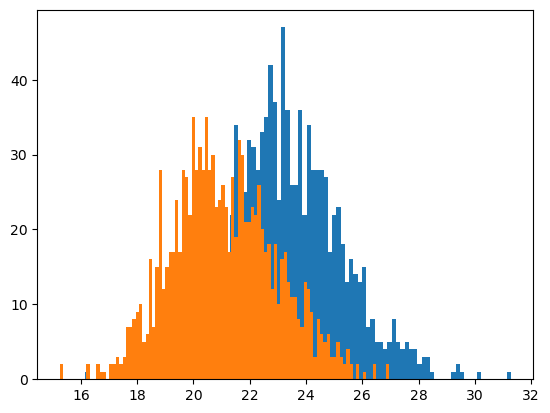

In [212]:
plt.hist(data['CR CHA [kHz]'], bins=100)
plt.hist(data['CR CHB [kHz]'], bins=100); plt.show()

In [213]:
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(data['CR CHA [kHz]'], data['CR CHB [kHz]'])
ks_statistic, p_value = ks_2samp(data['CR CHA [kHz]'], data['CR CHB [kHz]'])

# Perform the Anderson-Darling test
result = anderson_ksamp([data['CR CHA [kHz]'], data['CR CHB [kHz]']])

# Output results
print(f'Kolmogorov-Smirnov statistic: {ks_statistic:.4f}')
print(f'p-value: {p_value:.4e}')

# Output results
print(f'Anderson-Darling statistic: {result.statistic:.4f}')
print(f'p-value: {result.pvalue:.4e}')

Kolmogorov-Smirnov statistic: 0.4141
p-value: 1.6544e-87
Anderson-Darling statistic: 334.3676
p-value: 1.0000e-03


/var/folders/yj/sjr_202x2fvfp9wq2lrrdf0h0000gn/T/ipykernel_15962/1381608040.py:9: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  result = anderson_ksamp([data['CR CHA [kHz]'], data['CR CHB [kHz]']])


In [214]:
data = data[['CR CHA [kHz]', 'CR CHB [kHz]']].values

In [215]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
tdata = power.fit_transform(data)

In [216]:
power.lambdas_

array([0.34055982, 0.07526974])

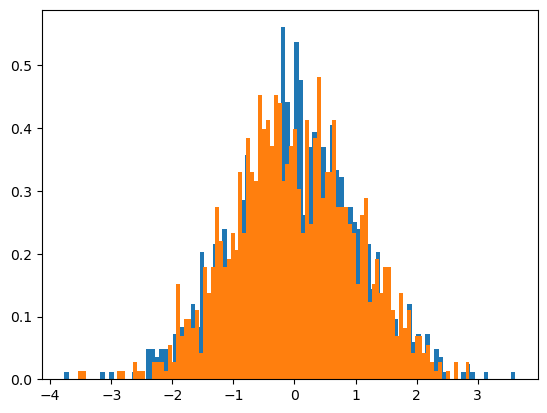

In [217]:
plt.hist(tdata[:,0], bins=100, density=True)
plt.hist(tdata[:,1], bins=100, density=True); plt.show()

In [218]:
for i in range(3):
    gmm = GaussianMixture(random_state=42, n_components=i+1)
    gmm_data = gmm.fit(tdata[:,0].reshape(-1,1))
    print(f'bic_{i+1}: {gmm_data.bic(tdata[:,0].reshape(-1,1))}')
    print(f'aic_{i+1}: {gmm_data.aic(tdata[:,0].reshape(-1,1))}')

bic_1: 3235.059246235005
aic_1: 3224.990470375174
bic_2: 3264.101384561922
aic_2: 3238.9294449123445
bic_3: 3284.7576957565307
aic_3: 3244.4825923172066


In [219]:
print(gmm_data.means_)
print(gmm_data.covariances_)

[[-0.06021198]
 [ 0.96341157]
 [-1.13696078]]
[[[0.27501867]]

 [[0.51004364]]

 [[0.45492969]]]


In [26]:
pct1 = pct.Dataloader(path1)
data = pct1.load()

In [27]:
cf = data.experiments['Measurement 1']['measurements'][0]['repetitions']['Correlation Function.csv']

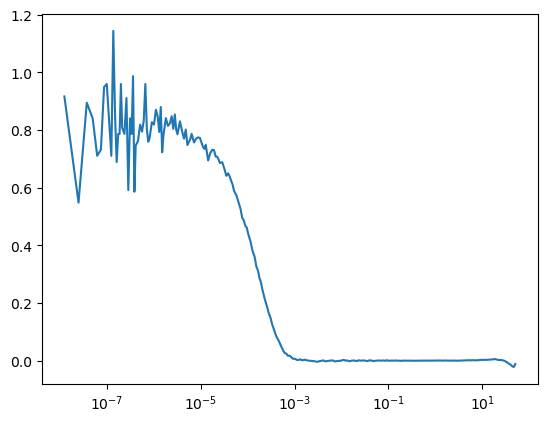

In [28]:
plt.plot(cf['Lag time [s]'], cf['Value'])
plt.xscale('log')

In [47]:
tt = data.experiments['Measurement 1']['measurements'][0]['repetitions']['Count Trace.csv']

AttributeError: 'DataFrame' object has no attribute 'experiments'

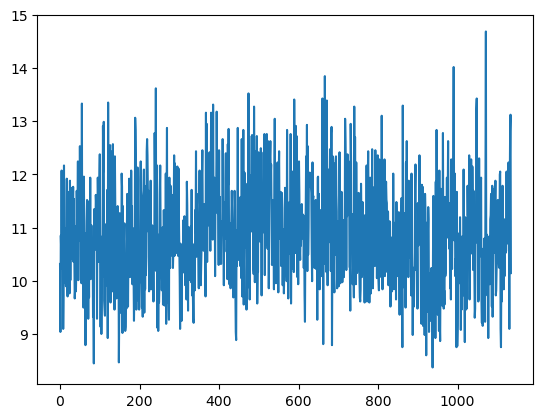

In [48]:
plt.plot(tt['CR CHB [kHz]'])

In [31]:
I_A = np.array(tt['CR CHA [kHz]'])
I_B = np.array(tt['CR CHA [kHz]'])

# Normalize by the average intensities
mean_I_A = np.mean(I_A)
mean_I_B = np.mean(I_B)

# Outer product of intensity traces
two_time_corr = np.outer(I_A, I_B) / (mean_I_A * mean_I_B)

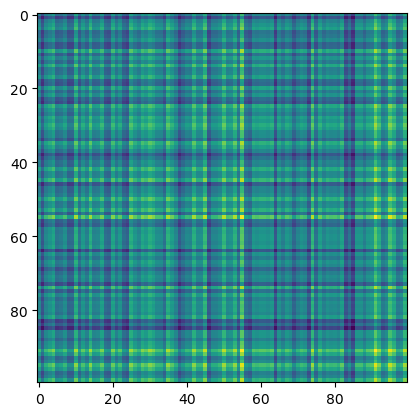

In [32]:
plt.imshow(two_time_corr[:100, :100])

In [33]:
tt['Time [s]']

0          0.000000
1          0.052470
2          0.104941
3          0.157411
4          0.209882
            ...    
11430    599.737648
11431    599.790118
11432    599.842589
11433    599.895059
11434    599.947530
Name: Time [s], Length: 11435, dtype: float64

In [34]:
test_corr1 = correlate(I_A,I_A,mode='same')

In [205]:
water_path = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/CMI/Data/PCT/MilliQ/25C/Measurement 46/Repetition 0/Count Trace.csv'
water_data = pd.read_csv(water_path, skiprows=2)

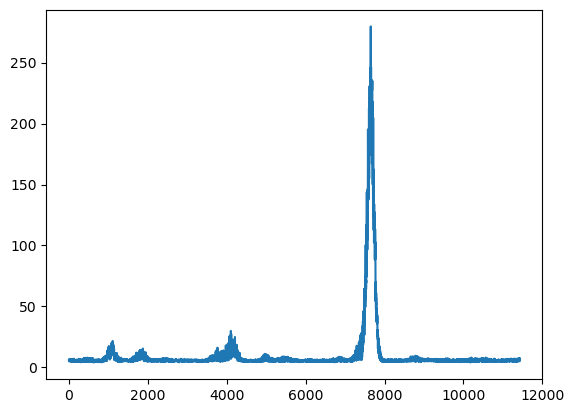

In [206]:
plt.plot(water_data['CR CHB [kHz]'])

counts/second * photons/count * seconds = photons/second

((y+1)**l - 1) / l

In [207]:
print(skew(water_data['CR CHB [kHz]']))
print(kurtosis(water_data['CR CHB [kHz]']))

7.039977535207166
52.34517586070186


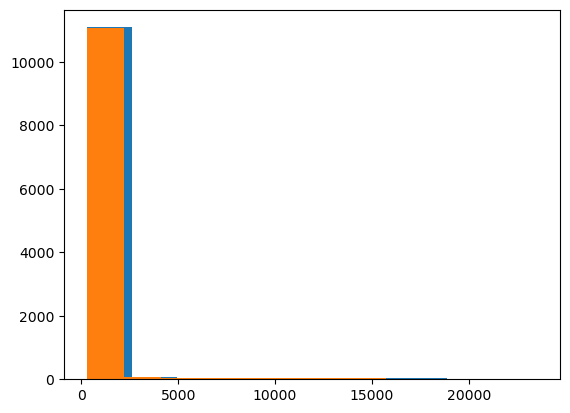

array([ 0.70696834, -2.46708887, -2.33678537])

In [208]:
water_data = (4000/3) * 0.052448 * water_data
plt.hist(water_data['CR CHA [kHz]'], bins=10)
plt.hist(water_data['CR CHB [kHz]'], bins=10); plt.show()
water_power = PowerTransformer(method='yeo-johnson', standardize=True)
water_pt_data = water_power.fit_transform(water_data)
water_power.lambdas_

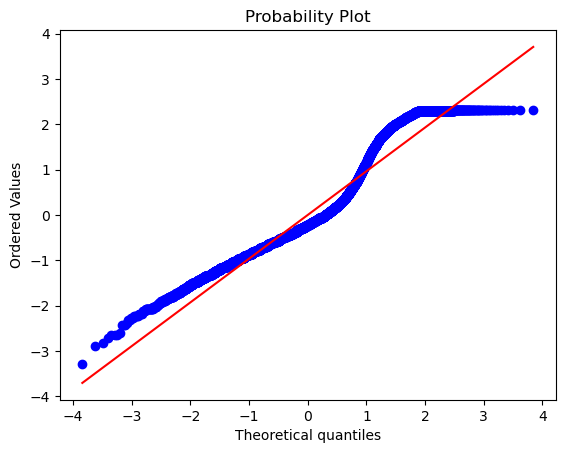

In [209]:
stats.probplot(water_pt_data[:,1], dist='norm', plot=plt)
plt.show()